In [1]:
# Original Source : https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/
# Original Data Source (John Hopkin's Repository) : https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
# Data Source : https://drive.google.com/file/d/1IJija1WXjC6gDtVAczyTsvSOmLe3iu6Y/view?usp=sharing

In [2]:
# Additional Features of Temperature and Humidity for Latitude and Longitude obtained using Python’s Weather API – Pyweatherbit

## Part 1 - Hypothesis Testing for impact of temperature on COVID-19

### Import Libraries

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import sqrt, abs, round
from scipy.stats import norm

### Import Data

In [14]:
data = pd.read_csv('./data/covid19_jhopkn/Corona_Updated.csv', parse_dates=[2]).drop(['Temp_Cat', 'Humid_Cat'], axis=1)
print(data.shape)
data.head()
# We are dropping 'Temp_Cat' and 'Humid_Cat' from csv file because it was created by previous users as per their custom need.

(206, 10)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity
0,Hubei,Mainland China,2020-03-10 15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86
1,NaN,Italy,2020-03-10 17:53:02,10149,631,724,43.0000,12.0000,12.9,64
2,NaN,Iran (Islamic Republic of),2020-03-10 19:13:20,8042,291,2731,32.0000,53.0000,11.9,9
3,NaN,Republic of Korea,2020-03-10 19:13:20,7513,54,247,36.0000,128.0000,4.9,41
4,NaN,France,2020-03-10 18:53:02,1784,33,12,47.0000,2.0000,11.9,93


<AxesSubplot:>

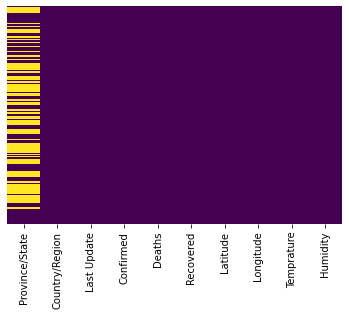

In [15]:
# Missing Values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### Hypothesis Testing

In [10]:
# Null Hypothesis: Temperature doesn’t affect COV-19 Outbreak
# Alternate Hypothesis: Temperature does affect COV-19 Outbreak
# Note: We are considering Temperature below 24 as Cold Climate and above 24 as Hot Climate in our dataset.

In [16]:
data['Temp_Cat'] = data['Temprature'].apply(lambda x : "Cold" if x < 24 else "Hot")
data_v2 = data[['Confirmed', 'Temp_Cat']]
data_v2['Temp_Cat'].value_counts()

Cold    175
Hot      31
Name: Temp_Cat, dtype: int64

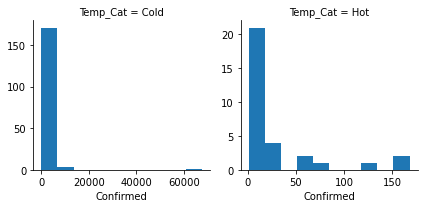

In [31]:
g = sns.FacetGrid(data=data, col='Temp_Cat', sharex=False, sharey=False)
g.map(plt.hist, 'Confirmed')

In [24]:
# Since there are more than 30 readings available use two-sample z-test.
def TwoSampZ(x1, x2, sigma1, sigma2, n1, n2):
    pooled_sigma = sqrt(sigma1**2/n1 + sigma2**2/n2)
    z = (x1 - x2)/pooled_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval

In [33]:
d1 = data_v2[(data_v2['Temp_Cat']=='Hot')]['Confirmed'].values
d2 = data_v2[(data_v2['Temp_Cat']=='Cold')]['Confirmed'].values

m1, m2 = d1.mean(), d2.mean()
sd1, sd2 = d1.std(), d2.std()
n1, n2 = d1.shape[0], d2.shape[0]

z, p = TwoSampZ(m1, m2, sd1, sd2, n1, n2)

z_score = np.round(z,8)
p_val = np.round(p,6)

if (p_val<0.05):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : Not Significant'

print (p_val)
print (Hypothesis_Status)

0.101072
Do not reject Null Hypothesis : Not Significant


In [34]:
# There are certain limitations of the Z test for COVID-19 datasets:
#     Sample data may not be well representative of population data
#     Sample variance may not be a good estimator of the population variance
#     Variability in a state’s capacity to deal with this pandemic
#     Socio-Economic Reasons
#     Early breakout in certain places
#     Some states could be hiding the data for geopolitical reasons

## Part 2 - A/B Testing for significance of a minor change in newsletter(dummy_data)

In [ ]:
# Original Source : https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/
# Data Source : https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/data.csv

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 

### Import Data

In [3]:
data= pd.read_csv("./data/covid19_jhopkn/dummy_data_abtest.csv")
print(data.shape)
data.head()

(30, 3)


,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


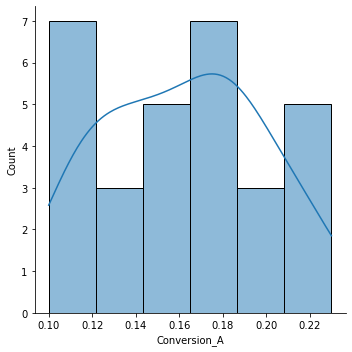

In [9]:
sns.displot(data.Conversion_A, kde=True)

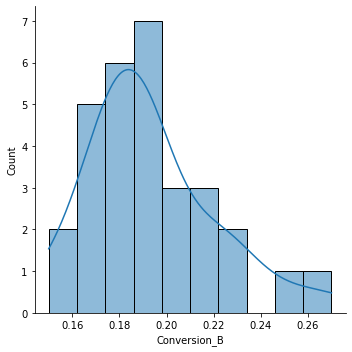

In [10]:
sns.displot(data.Conversion_B, kde=True)

In [13]:
# Mean of customer conversion rates for both groups(control:A and test:B)
data.Conversion_A.mean(), data.Conversion_B.mean()

(0.16200000000000003, 0.19333333333333338)

In [ ]:
# H0 : "there is no difference in the conversion rate in customers receiving newsletter A and B"

### A/B Testing through 'two sample t-test'

In [14]:
t_stat, p_val= ss.ttest_ind(data.Conversion_B,data.Conversion_A)
t_stat , p_val

(3.78736793091929, 0.000363796012828762)

In [ ]:
# p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis.
# This means that in the above A/B testing, newsletter B is performing better than newsletter A.